In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once') 

In [8]:
df=pd.read_csv('datos/bikes_preparado.csv')
df=df.drop(['Unnamed: 0'], axis=1)
numericas=df.select_dtypes(include=np.number)
numericas.head()

,year,month,holiday,weekday,weathersit,atemp,hum,windspeed,bike_count
0,-1.0,-0.617143,4.636809,-1.460318,1.112473,0.677080,1.484801,-0.628344,985
1,-1.0,-0.617143,-0.215666,-0.965295,1.112473,0.577171,0.757869,0.391271,801
2,-1.0,-0.617143,-0.215666,-0.470272,-0.758977,-1.083596,-0.956453,0.388609,1349
3,-1.0,-0.617143,-0.215666,0.024751,-0.758977,-0.854017,0.058056,-0.630080,1562
4,-1.0,-0.617143,-0.215666,0.519774,-0.758977,-0.680718,-0.958546,-0.322158,1600


In [9]:
#MODELO DECISSION TREE

# al igual que en la regresión lineal tenemos que separar nuestro dataframe en X e y

X = numericas.drop("bike_count", axis = 1)
y = numericas["bike_count"]

In [10]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [11]:

# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeRegressor(random_state =42)  #Como no sabemos la profundidad adecuada, 
                    #dejamos que le modelo lo haga con todas las variables y más adelante, elegiremos la que mejor ha predicho los datos.


In [12]:

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)


DecisionTreeRegressor(random_state=42)

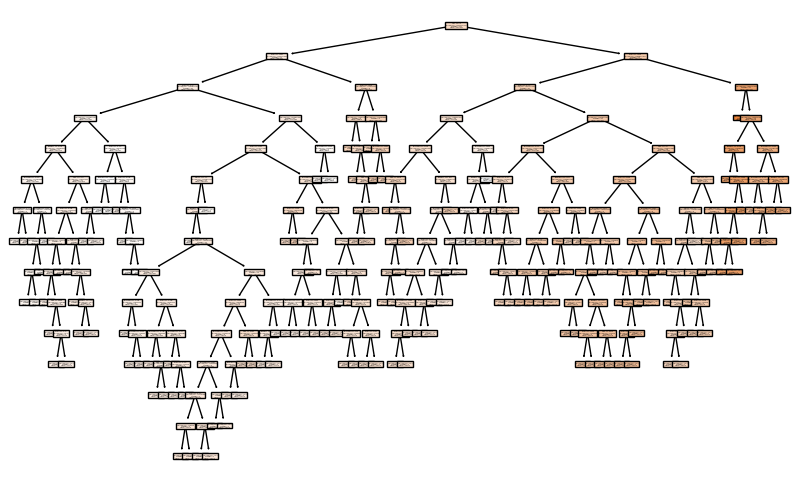

In [13]:

#Para mostrar el modelo en arbol
fig = plt.figure(figsize = (10,6))  
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show();


In [14]:

#HIPER-PARÁMETROS

# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train.columns))
max_features


2.8284271247461903

In [15]:


# max depth compruebo
print(arbol.tree_.max_depth)


14


In [16]:

# hacemos las predicciones sobre los dos set de datos el X_test y el X_train

y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)


In [17]:
#Métricas
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df


In [18]:


# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1.head()


,MAE,MSE,RMSE,R2,set,modelo
0,517.055556,431291.333333,656.727747,0.743477,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [19]:
# MODELO II DECISION TREE PARA ESTABLECER LA PROFUNDIDAD DEL PROPIO MODELO

# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar 
# y los valores que queremos 

param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, 
                                #la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. 
                                #Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 

        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 




In [20]:

# una vez creado el diccionario iniciaremos el modelo con GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva


In [21]:

# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [22]:


# este método (BEST_ESTIMATOR) nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 
# variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo


DecisionTreeRegressor(max_depth=4, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

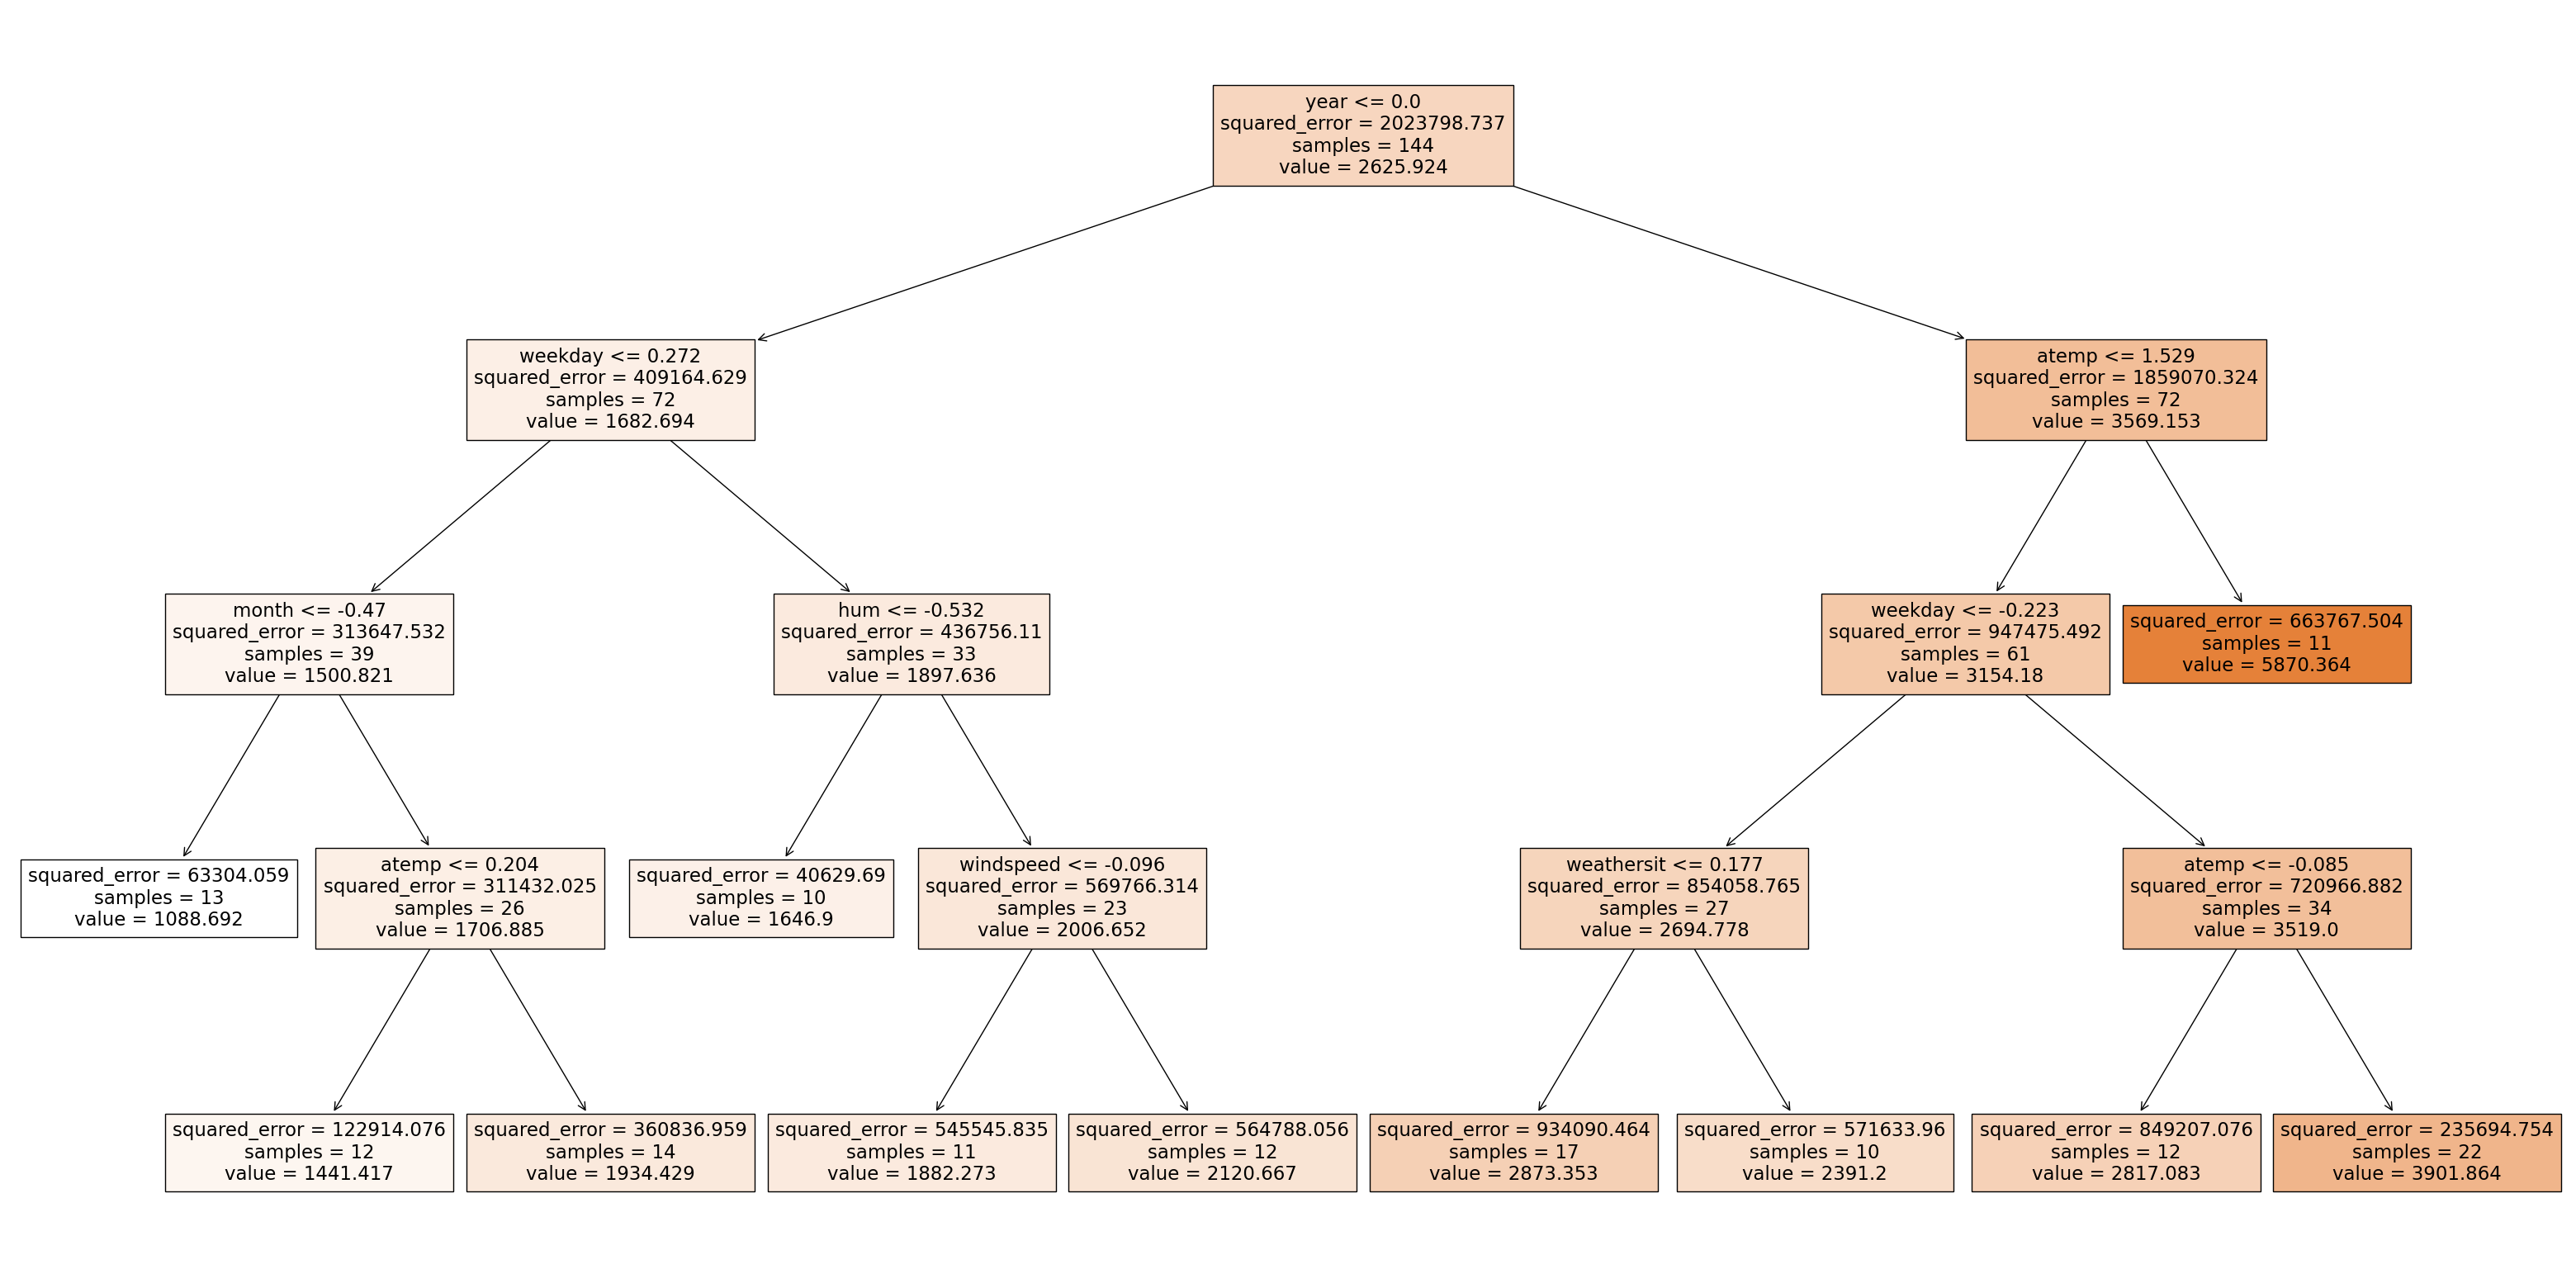

In [23]:

# veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);


In [24]:
#MÉTRICAS PARA COMPROBAR LA CALIDAD DEL MODELO

y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)


dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2



,MAE,MSE,RMSE,R2,set,modelo
0,630.491869,743370.337754,862.189270,0.557858,test,Decision tree II
1,506.803032,450051.988877,670.859142,0.777620,train,Decision tree II


In [25]:

# vamos  a juntar los dataframes de los resultados de los modelos para poder compararlos mejor

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results


,MAE,MSE,RMSE,R2,set,modelo
0,517.055556,431291.333333,656.727747,0.743477,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,630.491869,743370.337754,862.189270,0.557858,test,Decision tree II
1,506.803032,450051.988877,670.859142,0.777620,train,Decision tree II


In [26]:
df_decision_results.to_csv('datos/bikes_DT.csv')

In [27]:
# En invierno se podría utilizar el segundo modelo de predicción, ya que se ajusta un poco más. 
# El otro es demasiado automático.

In [28]:

# COMPROBACIÓN DE LA IMPORTANCIA DE VARIABLES PREDICTORAS

# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )



In [29]:

# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)


In [30]:


# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores



Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,year,0.565327
5,atemp,0.350646
3,weekday,0.057533
1,month,0.014615
4,weathersit,0.006459
6,hum,0.003980
7,windspeed,0.001439
2,holiday,0.000000


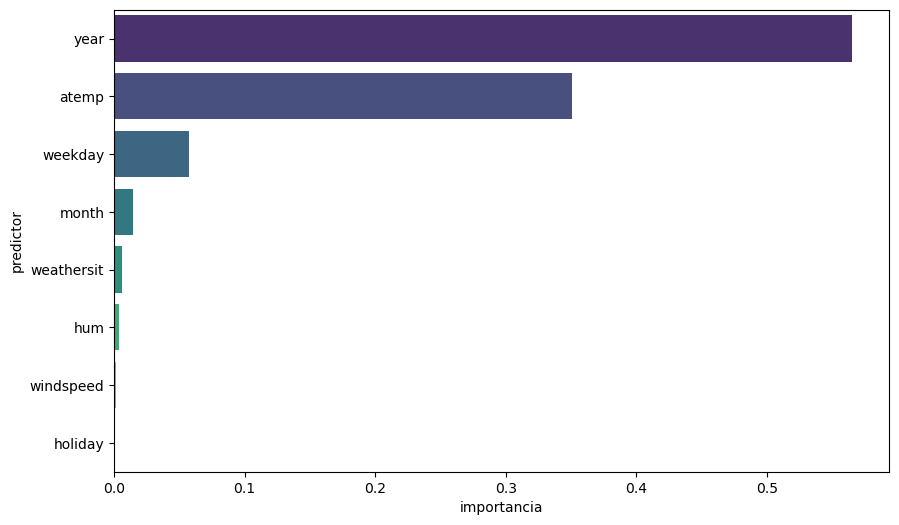

In [31]:

# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis")
plt.show();
